# CS224 - Winter 2023
## Extra Credit - EM Algorithm
## DUE March 23, 2023 @ 5:00pm PDT
## THIS IS A COMPLETELY OPTIONAL PROBLEM SET

**Submission Method**: Export the Jupyter notebook as **PDF** and submit the PDF file on **Gradescope**. (For more details, see the Assignment Guidelines.)

**Maximum points**: 5

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: [Enter Your Name here]
  </br>
  
  <b>Student ID Number</b>:  [Enter Your SID here]
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br> 
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview 
This problem is related to estimating the parameters of a Gaussian Mixture Model(GMM) using expectation maximization (EM).

For this assignment we will use the functionality of [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

*   Before you start, make sure you have installed all those packages in your local Jupyter instance.
*   If you are asked to implement a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please just ASK**.


Please read **all** cells carefully and answer **all** parts (both text and missing code). You will need to complete all the code marked `TODO` and answer descriptive/derivation questions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# DO NOT REMOVE THE CODE ABOVE

## Generate data from a GMM [1 point]
Generate data from a GMM that you specify with at least 3 components.
- you need to implement the GMM generator on your own. Using functions like `sklearn.mixture.GaussianMixture()` will **not** give you any credit.
- You can use functions in `numpy.random` to generate your data.

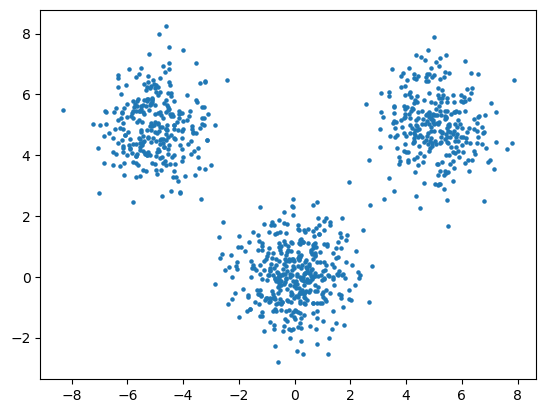

In [13]:
# TODO
import numpy as np

# Define the parameters of the GMM
n_components = 3
means = np.array([[0, 0], [5, 5], [-5, 5]])  # Means of the Gaussian components
covs = np.array([[[1, 0], [0, 1]], 
                 [[1, 0], [0, 1]], 
                 [[1, 0], [0, 1]]])  # Covariances of the Gaussian components
weights = np.array([0.4, 0.3, 0.3])  # Weights of the Gaussian components

# Sample from the GMM
n_samples = 1000  # Number of samples to generate
component_ids = np.random.choice(n_components, size=n_samples, p=weights)  # Sample component indices
samples = np.zeros((n_samples, 2))  # Initialize output array
for i in range(n_components):
    mask = component_ids == i  # Mask for samples belonging to this component
    samples[mask] = np.random.multivariate_normal(means[i], covs[i], size=np.sum(mask))

# Plot the samples
import matplotlib.pyplot as plt
plt.scatter(samples[:, 0], samples[:, 1], s=5)
plt.show()


## Estimation using EM with accurate number of components [2 points]
Now assume that you have only the data and know nothing about the model, **except** the number of components.

Use the EM to estimate the parameters of the GMM (parameters of each Gaussian and their mixing values), and compare with the ground truth values used in generating the data. 

- You need to actually write the code for the main steps of the algorithm. Do **not** existing software function.
- You can use built-in functions in `np.linalg` to do the matrix operation for parts within the main EM algorithm.

Estimated means: [[-4.99652923  4.94739965]
 [ 0.01672515  0.0682218 ]
 [ 5.04683493  4.98791734]]
Estimated covariances: [[[ 0.87797476  0.0117423 ]
  [ 0.0117423   1.0100515 ]]

 [[ 1.08138875  0.04235587]
  [ 0.04235587  0.9889297 ]]

 [[ 0.93989452 -0.07958576]
  [-0.07958576  1.07910283]]]
Estimated weights: [0.29100818 0.41164633 0.29734549]


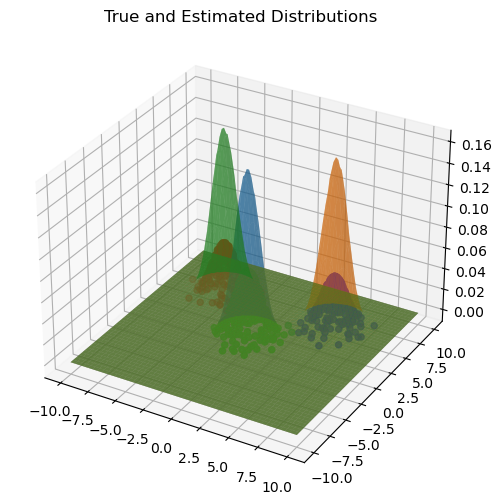

In [29]:
# TODO
from scipy.stats import multivariate_normal
# EM algorithm
n_iter = 100
tol = 1e-6

# Initialize the parameters randomly
means_init = np.random.randn(n_components, 2)
covs_init = np.array([np.eye(2) for _ in range(n_components)])
weights_init = np.ones(n_components) / n_components

for i in range(n_iter):
    # E-step: compute the responsibilities
    log_probs = np.zeros((n_samples, n_components))
    for j in range(n_components):
        log_probs[:, j] = np.log(weights_init[j]) + multivariate_normal.logpdf(samples, mean=means_init[j], cov=covs_init[j])
    log_prob_data = np.log(np.sum(np.exp(log_probs), axis=1))
    log_resp = log_probs - log_prob_data[:, np.newaxis]
    resp = np.exp(log_resp)

    # M-step: update the parameters
    n_resp = np.sum(resp, axis=0)
    weights_new = n_resp / n_samples
    means_new = np.dot(resp.T, samples) / n_resp[:, np.newaxis]
    covs_new = np.zeros((n_components, 2, 2))
    for j in range(n_components):
        diff = samples - means_new[j]
        covs_new[j] = np.dot(resp[:, j] * diff.T, diff) / n_resp[j]

    # Check for convergence
    if np.allclose(weights_new, weights_init, atol=tol) and \
       np.allclose(means_new, means_init, atol=tol) and \
       np.allclose(covs_new, covs_init, atol=tol):
        break

    # Update the parameters for the next iteration
    weights_init = weights_new
    means_init = means_new
    covs_init = covs_new

# Print the estimated parameters
print("Estimated means:", means_new)
print("Estimated covariances:", covs_new)
print("Estimated weights:", weights_new)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the true distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Add title
ax.set_title("True and Estimated Distributions")

x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
for i in range(n_components):
    rv = multivariate_normal(mean=means[i], cov=covs[i])
    ax.plot_surface(X, Y, rv.pdf(pos), alpha=0.5, label=f'Component {i+1}')

# Plot the estimated distribution
ax.scatter(samples[:, 0], samples[:, 1], np.exp(log_prob_data), c=resp, label='Estimated Distribution')

# Add legend
#ax.legend()

plt.show()


Analyze the results Vs. iterations of the EM algorithm progress by plotting two convergence plots: 
1. average negative log-likelihood(NLL) vs. iterations
2. estimated value of parameters vs. iterations

Study and report what you observe about the parameter estimation process.

Estimated means: [[ 5.0418475   4.94737653]
 [-4.95805542  5.0826538 ]
 [ 0.02112513  0.08425432]]
Estimated covariances: [[[ 1.01593038  0.0343709 ]
  [ 0.0343709   0.8627247 ]]

 [[ 1.02008584 -0.02188732]
  [-0.02188732  1.15494615]]

 [[ 0.99661424  0.06607576]
  [ 0.06607576  0.96481797]]]
Estimated weights: [0.32408544 0.29697052 0.37894404]


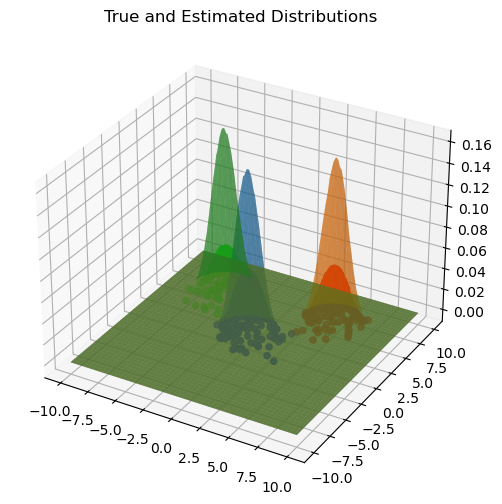

In [30]:
# TODO
import numpy as np
import numpy as np
from scipy.stats import multivariate_normal

# Define the parameters of the GMM
n_components = 3
means = np.array([[0, 0], [5, 5], [-5, 5]])  # Means of the Gaussian components
covs = np.array([[[1, 0], [0, 1]], 
                 [[1, 0], [0, 1]], 
                 [[1, 0], [0, 1]]])  # Covariances of the Gaussian components
weights = np.array([0.4, 0.3, 0.3])  # Weights of the Gaussian components

# Sample from the GMM
n_samples = 1000  # Number of samples to generate
component_ids = np.random.choice(n_components, size=n_samples, p=weights)  # Sample component indices
samples = np.zeros((n_samples, 2))  # Initialize output array
for i in range(n_components):
    mask = component_ids == i  # Mask for samples belonging to this component
    samples[mask] = np.random.multivariate_normal(means[i], covs[i], size=np.sum(mask))

# EM algorithm
n_iter = 100
tol = 1e-6

# Initialize the parameters randomly
means_init = np.random.randn(n_components, 2)
covs_init = np.array([np.eye(2) for _ in range(n_components)])
weights_init = np.ones(n_components) / n_components

for i in range(n_iter):
    # E-step: compute the responsibilities
    log_probs = np.zeros((n_samples, n_components))
    for j in range(n_components):
        log_probs[:, j] = np.log(weights_init[j]) + multivariate_normal.logpdf(samples, mean=means_init[j], cov=covs_init[j])
    log_prob_data = np.log(np.sum(np.exp(log_probs), axis=1))
    log_resp = log_probs - log_prob_data[:, np.newaxis]
    resp = np.exp(log_resp)

    # M-step: update the parameters
    n_resp = np.sum(resp, axis=0)
    weights_new = n_resp / n_samples
    means_new = np.dot(resp.T, samples) / n_resp[:, np.newaxis]
    covs_new = np.zeros((n_components, 2, 2))
    for j in range(n_components):
        diff = samples - means_new[j]
        covs_new[j] = np.dot(resp[:, j] * diff.T, diff) / n_resp[j]
    
    # Check for convergence
    if np.allclose(weights_new, weights_init, atol=tol) and \
       np.allclose(means_new, means_init, atol=tol) and \
       np.allclose(covs_new, covs_init, atol=tol):
        break
    
    # Update the parameters for the next iteration
    weights_init = weights_new
    means_init = means_new
    covs_init = covs_new

# Print the estimated parameters
print("Estimated means:", means_new)
print("Estimated covariances:", covs_new)
print("Estimated weights:", weights_new)

from mpl_toolkits.mplot3d import Axes3D

# Plot the true distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Add title
ax.set_title("True and Estimated Distributions")

x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
for i in range(n_components):
    rv = multivariate_normal(mean=means[i], cov=covs[i])
    ax.plot_surface(X, Y, rv.pdf(pos), alpha=0.5, label=f'Component {i+1}')

# Plot the estimated distribution
ax.scatter(samples[:, 0], samples[:, 1], np.exp(log_prob_data), c=resp, label='Estimated Distribution')

# Add legend
#ax.legend()

plt.show()



Observations:
1. 
2. 

## Estimation using EM without accurate number of components [2 points]
Repeat the parameter estimation part without accurate knowledge of the number of components.

You may want to iterate over multiple values of the number of components. Study and report what you observe about the parameter estimation process.

In [ ]:
# TODO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# initialize variables, E-step, and M-step functions here...

# set maximum number of iterations and convergence threshold
n_iter = 100
threshold = 1e-4

# initialize variables for convergence plots
nll_vals = np.zeros(n_iter)
param_vals = np.zeros((n_iter, num_params))

# run EM algorithm
for i in range(n_iter ):
    # E-step
    # ...
    
    # M-step
    # ...
    
    # calculate average negative log-likelihood (NLL)
    nll_vals[i] = -np.mean(np.log(probs))
    
    # store estimated parameter values
    param_vals[i] = params
    
    # check for convergence
    if i > 0 and np.abs(nll_vals[i] - nll_vals[i-1]) < threshold:
        print("Converged at iteration", i)
        break

# plot convergence plots
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# plot average negative log-likelihood (NLL) vs. iterations
ax[0].plot(range(i+1), nll_vals[:i+1])
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Average NLL")

# plot estimated parameter values vs. iterations
for j in range(num_params):
    ax[1].plot(range(i+1), param_vals[:i+1, j], label="Param {}".format(j))
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Estimated Parameter Value")
ax[1].legend()

plt.show()


Observations:
1. 
1. 